In [344]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pygal_maps_world.maps import World

### Read Data from CSV File

In [345]:
df = pd.read_csv('dataset.csv', usecols=list(range(1, 23)), na_values = "ND", \
                 index_col = 0, parse_dates = True)
print("Data consists of " + str(df.shape[0]) + " exchange rate values over the last 20 years for " + str(df.shape[1]) + " regions.")
df.head()

Data consists of 5217 exchange rate values over the last 20 years for 21 regions.


,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,6.126,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,6.085,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,6.070,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,6.080,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,6.057,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85


### Remove Currency Name from Column Names for Better Readability

In [346]:
df.columns = [x.split("-")[0].strip() for x in df.columns]
print("The columns are:")
for x in df.columns:
    print("\t" + x) 

The columns are:
	AUSTRALIA
	EURO AREA
	NEW ZEALAND
	UNITED KINGDOM
	BRAZIL
	CANADA
	CHINA
	HONG KONG
	INDIA
	KOREA
	MEXICO
	SOUTH AFRICA
	SINGAPORE
	DENMARK
	JAPAN
	MALAYSIA
	NORWAY
	SWEDEN
	SRI LANKA
	SWITZERLAND
	TAIWAN


### Check for Null Values

In [347]:
print("Null values of exchange rate for each region:")
df.isnull().sum()

Null values of exchange rate for each region:


AUSTRALIA         198
EURO AREA         198
NEW ZEALAND       198
UNITED KINGDOM    198
BRAZIL            198
CANADA            198
CHINA             197
HONG KONG         198
INDIA             199
KOREA             198
MEXICO            198
SOUTH AFRICA      198
SINGAPORE         198
DENMARK           198
JAPAN             198
MALAYSIA          198
NORWAY            198
SWEDEN            198
SRI LANKA         198
SWITZERLAND       198
TAIWAN            201
dtype: int64

### Remove Rows with Null Values

In [348]:
df = df.dropna()
print("Remaining number of rows is " + str(df.shape[0]))

Remaining number of rows is 5015


### Scale all exchange rate values such that each value is  expressed as a multiple of the first value (in that column)

In [349]:
scaled_df = df/df.iloc[0]
scaled_df.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SOUTH AFRICA,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
2000-01-04,1.004416,0.985072,1.010771,0.993980,1.019668,1.003664,1.000012,1.000129,1.0,0.995124,...,0.993307,0.998309,0.984855,1.013668,1.0,0.996233,0.990169,1.004841,0.984628,0.975143
2000-01-05,1.006262,0.982634,1.016077,0.991214,1.028255,1.003664,1.000000,1.000193,1.0,1.006206,...,0.990859,0.999819,0.983490,1.020354,1.0,0.996359,0.989340,1.008990,0.982161,0.981517
2000-01-06,1.007843,0.983650,1.021174,0.987634,1.019391,1.007328,0.999988,1.000257,1.0,1.016401,...,0.992491,1.005555,0.984104,1.034317,1.0,0.996986,0.991058,1.008990,0.983047,1.011791
2000-01-07,1.006591,0.986493,1.018231,0.993166,1.014404,1.002765,0.999952,1.000231,1.0,1.008865,...,0.988737,1.003743,0.986287,1.034120,1.0,1.000251,0.996684,1.011757,0.988297,0.983110


### Categorize the 21 countries into two types - ones whose currencies have undergone depreciation (increase in the numerical value of USD/curr) and ones whose currencies have undergone appreciation (decrease in the numerical value of USD/curr)

In [350]:
first_decade_df = df[:"2010"]
increase_cols = [x for x in first_decade_df.columns if first_decade_df[x][-1] > first_decade_df[x][0]]
decrease_cols = [x for x in first_decade_df.columns if first_decade_df[x][-1] < first_decade_df[x][0]]

print("2000 to 2009")

first_decade_deps = []
print(str(len(increase_cols)) + " countries' currencies have shown depreciation. They are:")
for x in increase_cols:
    print("\t" + x)
    first_decade_deps.append(x)
    
first_decade_apps = []
print(str(len(decrease_cols)) + " countries' currencies have shown appreciation. They are:")
for x in decrease_cols:
    print("\t" + x)
    first_decade_apps.append(x)

2000 to 2009
7 countries' currencies have shown depreciation. They are:
	UNITED KINGDOM
	HONG KONG
	INDIA
	KOREA
	MEXICO
	SOUTH AFRICA
	SRI LANKA
14 countries' currencies have shown appreciation. They are:
	AUSTRALIA
	EURO AREA
	NEW ZEALAND
	BRAZIL
	CANADA
	CHINA
	SINGAPORE
	DENMARK
	JAPAN
	MALAYSIA
	NORWAY
	SWEDEN
	SWITZERLAND
	TAIWAN


In [351]:
second_decade_df = df['2010':]
increase_cols = [x for x in second_decade_df.columns if second_decade_df[x][-1] > second_decade_df[x][0]]
decrease_cols = [x for x in second_decade_df.columns if second_decade_df[x][-1] < second_decade_df[x][0]]

print("2010 to 2019")

second_decade_deps = []
print(str(len(increase_cols)) + " countries' currencies have shown depreciation. They are:")
for x in increase_cols:
    print("\t" + x)
    second_decade_deps.append(x)

second_decade_apps = []
print(str(len(decrease_cols)) + " countries' currencies have shown appreciation. They are:")
for x in decrease_cols:
    print("\t" + x)
    second_decade_apps.append(x)

2010 to 2019
18 countries' currencies have shown depreciation. They are:
	AUSTRALIA
	EURO AREA
	NEW ZEALAND
	UNITED KINGDOM
	BRAZIL
	CANADA
	CHINA
	HONG KONG
	INDIA
	KOREA
	MEXICO
	SOUTH AFRICA
	DENMARK
	JAPAN
	MALAYSIA
	NORWAY
	SWEDEN
	SRI LANKA
3 countries' currencies have shown appreciation. They are:
	SINGAPORE
	SWITZERLAND
	TAIWAN


In [352]:
increase_cols = [x for x in df.columns if df[x][-1] > df[x][0]]
decrease_cols = [x for x in df.columns if df[x][-1] < df[x][0]]

print("Overall")
overall_deps = []
print(str(len(increase_cols)) + " countries' currencies have shown depreciation. They are:")
for x in increase_cols:
    print("\t" + x)
    overall_deps.append(x)    
    
overall_apps = []
print(str(len(decrease_cols)) + " countries' currencies have shown appreciation. They are:")
for x in decrease_cols:
    print("\t" + x)
    overall_apps.append(x)

Overall
12 countries' currencies have shown depreciation. They are:
	UNITED KINGDOM
	BRAZIL
	HONG KONG
	INDIA
	KOREA
	MEXICO
	SOUTH AFRICA
	JAPAN
	MALAYSIA
	NORWAY
	SWEDEN
	SRI LANKA
9 countries' currencies have shown appreciation. They are:
	AUSTRALIA
	EURO AREA
	NEW ZEALAND
	CANADA
	CHINA
	SINGAPORE
	DENMARK
	SWITZERLAND
	TAIWAN


In [353]:
app_then_dep = []
dep_then_app = []
full_app = []
full_dep = []
for x in df.columns:
    if x in first_decade_apps and x in second_decade_apps:
        full_app.append(x)
    elif x in first_decade_apps and x in second_decade_deps:
        app_then_dep.append(x)
    elif x in first_decade_deps and x in second_decade_deps:
        full_dep.append(x)
    else:
        dep_then_app.append(x)

print(str(len(full_app)) + " regions appreciated continuously:")
for x in full_app:
    print("\t" + x)
print(str(len(full_dep)) + " regions depreciated continuously:")
for x in full_dep:
    print("\t" + x)
print(str(len(dep_then_app)) + " regions depreciated and then appreciated:")
for x in dep_then_app:
    print("\t" + x)
print(str(len(app_then_dep)) + " regions appreciated and then depreciated:")
for x in app_then_dep:
    print("\t" + x)

3 regions appreciated continuously:
	SINGAPORE
	SWITZERLAND
	TAIWAN
7 regions depreciated continuously:
	UNITED KINGDOM
	HONG KONG
	INDIA
	KOREA
	MEXICO
	SOUTH AFRICA
	SRI LANKA
0 regions depreciated and then appreciated:
11 regions appreciated and then depreciated:
	AUSTRALIA
	EURO AREA
	NEW ZEALAND
	BRAZIL
	CANADA
	CHINA
	DENMARK
	JAPAN
	MALAYSIA
	NORWAY
	SWEDEN


### Plot the change in exchange rates of all the regions whose currencies depreciated over the last 20 years

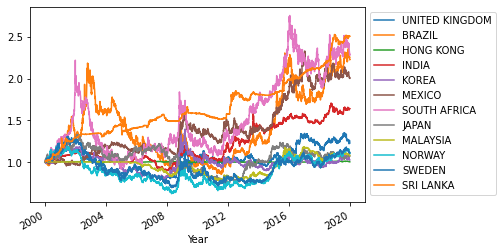

In [354]:
scaled_df[increase_cols].plot()
plt.xlabel("Year")
#plt.ylabel("Value")
_ = plt.legend(bbox_to_anchor=(1, 1))

### Plot the change in exchange rates of all the regions whose currencies appreciated over the last 20 years

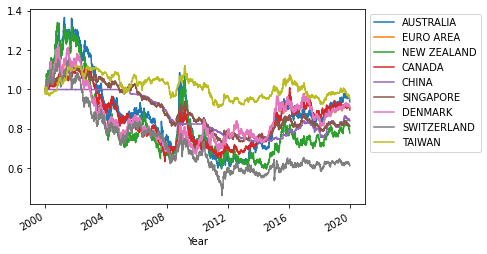

In [355]:
scaled_df[decrease_cols].plot()
plt.xlabel("Year")
#plt.ylabel("Value")
_ = plt.legend(bbox_to_anchor=(1, 1))

### Plot the appreciation ratios and decpreciation ratios of each region in the dataset on a world map
Open world.svg to see the plot

In [356]:
worldmap_chart = World()
country_codes = {
    'AUSTRALIA': 'au',
    'EURO AREA': ['at', 'be', 'cy', 'ee', 'fi', 'fr', 'de', 'gr', 'ie', 'it', 'lv', 'lt', \
                 'lu', 'mt', 'nl', 'pt', 'sk', 'si', 'es'],
    'NEW ZEALAND':'nz',
    'UNITED KINGDOM': 'uk',
    'BRAZIL': 'br',
    'CANADA': 'ca',
    'CHINA': 'cn',
    'HONG KONG': 'hk',
    'INDIA': 'in',
    'KOREA': ['kp', 'kr'],
    'MEXICO': 'mx',
    'SOUTH AFRICA': 'za',
    'SINGAPORE': 'sg',
    'DENMARK': 'dk',
    'JAPAN': 'jp',
    'MALAYSIA': 'my',
    'NORWAY': 'no',
    'SWEDEN': 'se',
    'SRI LANKA': 'lk',
    'SWITZERLAND': 'ch',
    'TAIWAN': 'tw'
}
worldmap_chart.title = 'Percentage Appreciation and Depreciation of Currencies over the last 20 years'
dic = {}
for x in scaled_df.columns:
    code = country_codes[x]
    change = scaled_df[x][-1]
    if type(code) != list:
        dic[code] = change
    else:
        for each_code in code:
            dic[each_code] = change
neg_dic = {}
pos_dic = {}
for code, change in dic.items():
    if change < 1.0:
        neg_dic[code] = round((1.0 - change)*100, 2)
    else:
        pos_dic[code] = round((change - 1.0)*100, 2)
worldmap_chart.add("Depreciation", pos_dic)
worldmap_chart.add("Appreciation", neg_dic)
worldmap_chart.render_to_file("world.svg")

### Pearson's Correlations between Currencies

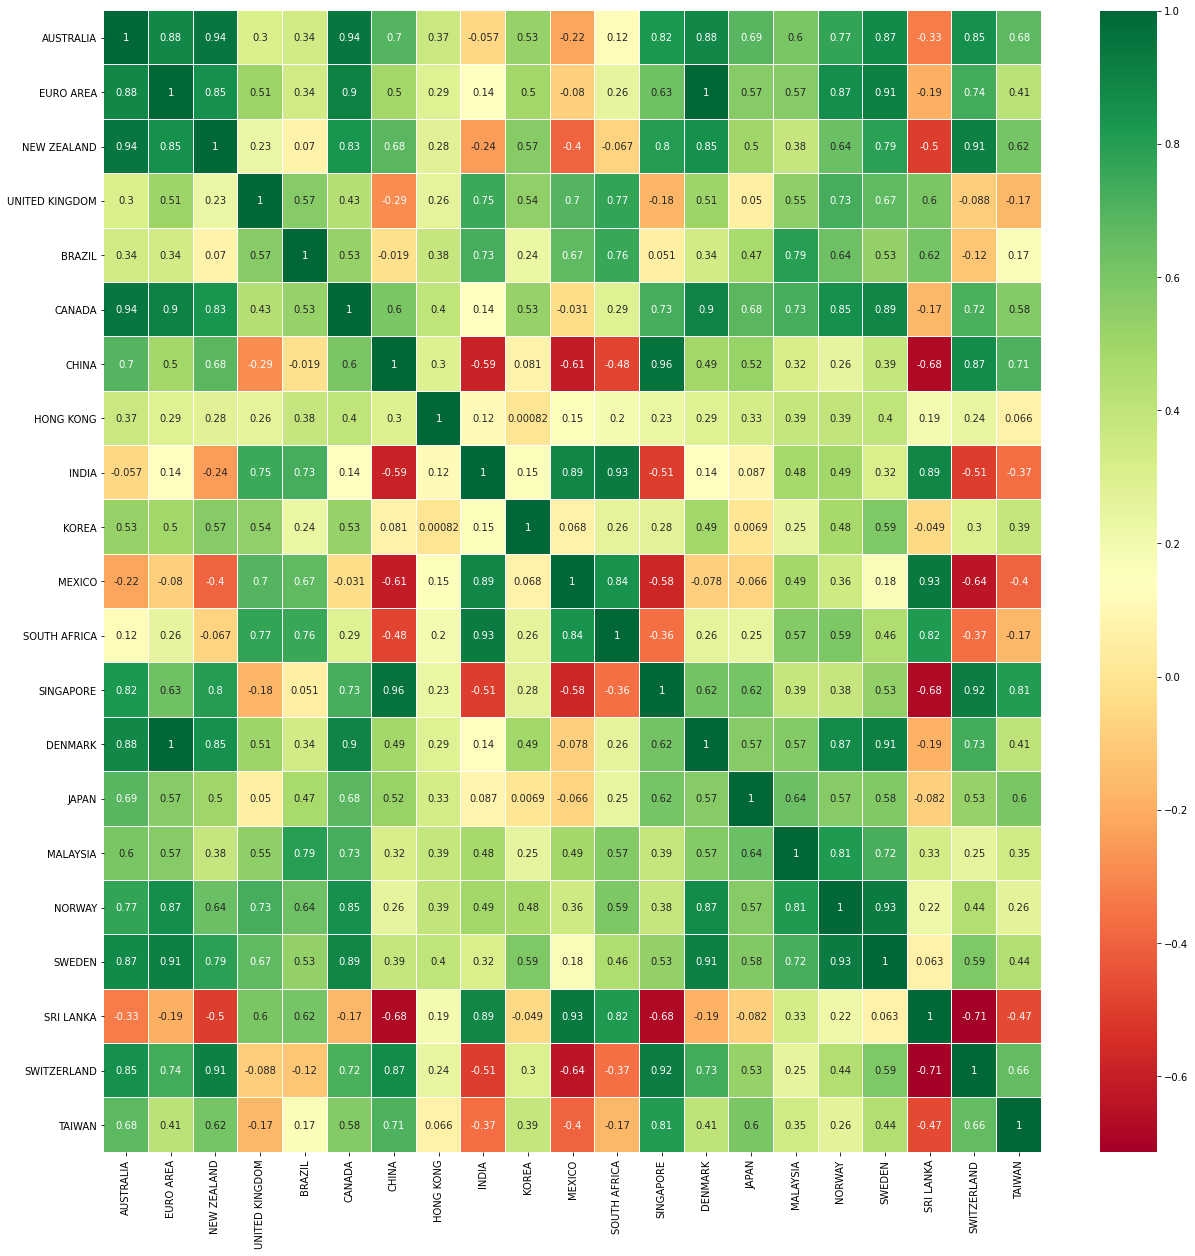

In [376]:
corrs = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(21,21))  
sns.heatmap(corrs, linewidths=0.01, annot=True, cmap="RdYlGn")
plt.savefig('corr.png')